<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-raw" data-toc-modified-id="Data-raw-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data raw</a></span><ul class="toc-item"><li><span><a href="#data-geoloc" data-toc-modified-id="data-geoloc-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>data geoloc</a></span></li><li><span><a href="#data-ES" data-toc-modified-id="data-ES-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>data ES</a></span></li><li><span><a href="#data-raw" data-toc-modified-id="data-raw-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>data raw</a></span></li></ul></li><li><span><a href="#Data-transform" data-toc-modified-id="Data-transform-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data transform</a></span></li><li><span><a href="#Plot-on-a-map" data-toc-modified-id="Plot-on-a-map-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plot on a map</a></span></li></ul></div>

In [115]:
import pandas as pd
import missingno as msno
from pyproj import Transformer
from pyproj import CRS
import numpy as np
import pyproj
import matplotlib.pyplot as plt

## Data raw

In [90]:
header = [
    'section',
    'nofinesset',
    'nofinessej',
    'rs',
    'rslongue',
    'complrs',
    'compldistrib',
    'numvoie',
    'typvoie',
    'voie',
    'compvoie',
    'lieuditbp',
    'commune',
    'departement',
    'libdepartement',
    'ligneacheminement',
    'telephone',
    'telecopie',
    'categetab',
    'libcategetab',
    'categagretab',
    'libcategagretab',
    'siret',
    'codeape',
    'codemft',
    'libmft',
    'codesph',
    'libsph',
    'dateouv',
    'dateautor',
    'maj',
    'numuai'
]

geoloc_names = [
    'nofinesset',
    'coordxet',
    'coordyet',
    'sourcecoordet',
    'datemaj'
]

file = './finess_geocoded_latest.csv'

In [91]:
df_raw = pd.read_csv(file, encoding ='latin1', sep=";", dtype=str, skiprows=1, header=None, names=header)
#df_raw.drop(columns=['section'], inplace=True)
#df_raw.head(2)

In [92]:
#msno.matrix(df_raw)

### data geoloc

In [93]:
#geoloc_raw = df_raw.iloc[int(len(df_raw)/2):]
geoloc_raw = df_raw[df_raw["section"] == "geolocalisation"]
df_geoloc_raw = geoloc_raw.drop(columns=['section'])
geoloc = df_geoloc_raw.drop(columns=geoloc_raw.columns[6:])
geoloc.rename(columns=lambda x: geoloc_names[list(geoloc.columns).index(x)], inplace=True)
geoloc.reset_index(drop = True, inplace = True) 
#geoloc.head(2)

### data ES

In [94]:
df_es_raw = df_raw[df_raw["section"] == "structureet"]
df_es = df_es_raw.drop(columns=['section'])
#df_es.head(2)
#df = df_raw.iloc[:int(len(df_raw)/2)]

### data raw

In [95]:
df_es['nofinesset'] = df_es['nofinesset'].astype(str)
geoloc['nofinesset'] = geoloc['nofinesset'].astype(str)
df_raw = df_es.merge(geoloc, on='nofinesset', how='left')

In [96]:
#df_raw.head()

In [97]:
#df_raw.shape

In [98]:
#msno.matrix(df_raw)

In [99]:
# sauvegarde en utf-8
df_raw.to_csv('RawfinessClean.csv', encoding='utf-8', sep=';')

## Data transform

> Informations sur la Géo-localisation : Le système d’information source contenant les coordonnées géographiques permettant de géo-localiser les établissements
répertoriés dans FINESS est le produit BD-ADRESSE en version 2.1 de l’IGN (Institut Géographique National).

> ZONE SYSTÈME GEODESIQUE ELLIPSOÏDE ASSOCIEE PROJECTION  
//France métropolitaine : RGF93 IAG GRS 1980 Coniques conformes 9 zones - Lambert 93  
//Guadeloupe, Martinique : WGS84 IAG GRS 1980 UTM Nord fuseau 20  
//Guyane : RGFG95 IAG GRS 1980 UTM Nord fuseau 22  
//Réunion : RGR92 IAG GRS 1980 UTM Sud fuseau 40  
//Mayotte : RGM04 IAG GRS 1980 UTM Sud fuseau 38  
//Saint Pierre et Miquelon : RGSPM06 IAG GRS 1980 UTM Nord fuseau 21  

data.gouv.fr

In [100]:
df_final= df_raw.astype(str)
df_final[['coordxet', 'coordyet']] = df_final[['coordxet', 'coordyet']].apply(pd.to_numeric)
df_final[['Code', 'Ville']] = df_final['ligneacheminement'].str.extract('(\d+)\s([\w+ ]*$)', expand=True)
df_final['Ville'] = df_final['Ville'].str.replace('CEDEX', '')
df_final['Ville'] = df_final['Ville'].str.replace('\d+', '')

In [101]:
#df_final.head(2)

In [102]:
df_cols = [
    'Numero FINESS ET',
    'Numero FINESS EJ',
    'Raison sociale',
    'Raison sociale longue',
    'Complement de raison sociale',
    'Complement de distribution',
    'Numero de voie',
    'Type de voie',
    'Libelle de voie',
    'Complément de voie',
    'Lieu-dit / BP',
    'Code Commune',
    'Departement',
    'Libelle departement',
    'Ligne d’acheminement (CodePostal+Lib commune)',
    'Telephone',
    'Telecopie',
    'Categorie d’etablissement',
    'Libelle categorie d’etablissement',
    'Categorie d’agregat d’etablissement',
    'Libelle categorie d’agregat d’etablissement',
    'Numero de SIRET',
    'Code APE',
    'Code MFT',
    'Libelle MFT',
    'Code SPH',
    'Libelle SPH',
    'Date d’ouverture',
    'Date d’autorisation',
    'Date de mise à jour sur la structure',
    'Numero éducation nationale',
    'CoordX',
    'CoordY',
    'Source des coordonnées',
    'Date de mise à jour des coordonnées',
    'Code Postal',
    'Commune'
]


In [70]:
df_crs[['Categorie d’etablissement','Libelle categorie d’etablissement' ]].drop_duplicates().head(20)

,Categorie d’etablissement,Libelle categorie d’etablissement
0,355,Centre Hospitalier (C.H.)
3,106,"Centre hospitalier, ex Hôpital local"
11,292,Centre Hospitalier Spécialisé lutte Maladies M...
12,202,Résidences autonomie
13,246,Etablissement et Service d'Aide par le Travail...
14,286,Club Equipe de Prévention
16,354,Service de Soins Infirmiers A Domicile (S.S.I....
17,610,Laboratoire d'Analyses
18,437,Foyer d'Accueil Médicalisé pour Adultes Handic...
19,182,Service d'Éducation Spéciale et de Soins à Dom...


In [103]:
df_final.columns = df_cols
df_final['CRS']= df_final['Source des coordonnées'].apply(lambda x:x.rsplit(',', 1)[1])

In [104]:
#df_final.head(2)

In [106]:
#df_final[df_final['Commune'].str.contains(r'NICE')].head(2)

In [108]:
#msno.matrix(df_final)

In [109]:
# sauvegarde en utf-8
df_final.to_csv('finessClean.csv', encoding='utf-8', sep=';')

## Plot France

In [110]:
df_coordinate = df_final.copy()

Use USPG ti find the good projection: https://epsg.org/home.html

In [111]:
EPSG_dict = {"LAMBERT_93":2154, "UTM_N20":4559, "UTM_N21":4467, "UTM_N22":2972, "UTM_S38":4471, "UTM_S40":2975}
df_coordinate["EPSG"] = df_coordinate["CRS"].map(EPSG_dict)

In [112]:
crs = [2154, 4559, 4467, 2972, 4471, 2975]
#https://github.com/pyproj4/pyproj/blob/master/docs/examples.rst
df_crs = pd.DataFrame()
for c in crs:
    df = df_coordinate.loc[df_coordinate["EPSG"] == c, :].copy()
    crs = CRS.from_epsg(c)
    proj = Transformer.from_crs(crs, crs.geodetic_crs, always_xy=True)
    xx, yy = proj.transform(df["CoordX"].values, df["CoordY"].values)
    df["Longitude"] = xx
    df["Latitude"] = yy
    df_crs= df_crs.append(df)

In [113]:
# sauvegarde en utf-8
df_crs.to_csv('finessCrsClean.csv', encoding='utf-8', sep=';')

In [114]:
#df_crs

## Plot on a map only metropole

In [121]:
# crs = [2154, 4559, 4467, 2972, 4471, 2975]
crs = [2154]
df_crs = pd.DataFrame()
for c in crs:
    df = df_coordinate.loc[df_coordinate["EPSG"] == c, :].copy()
    crs = CRS.from_epsg(c)
    proj = Transformer.from_crs(crs, crs.geodetic_crs, always_xy=True) #longitude, latitude
    xx, yy = proj.transform(df["CoordX"].values, df["CoordY"].values)
    df["Longitude"] = xx
    df["Latitude"] = yy
    df_crs= df_crs.append(df)
#df_crs.head(2)

In [122]:
BBox = (df_crs.Longitude.min(), df_crs.Longitude.max(),df_crs.Latitude.min(), df_crs.Latitude.max())
BBox

(-5.098945276231994, 9.549800851041716, 41.38718764890543, 51.07180250113598)

In [123]:
ruh_m = plt.imread("./map.png")

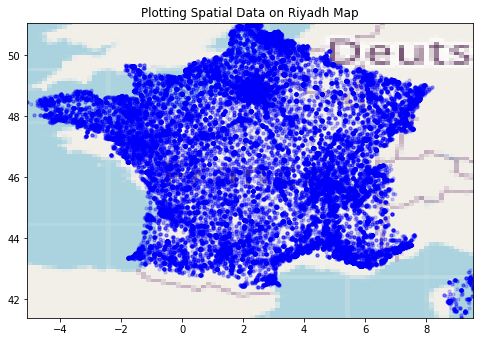

In [124]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df_crs.Longitude, df_crs.Latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on Riyadh Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

https://towardsdatascience.com/easy-steps-to-plot-geographic-data-on-a-map-python-11217859a2db

https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972

In [125]:
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline


In [126]:
street_map = gpd.read_file('/home/anthelix/Documents/data/202011_etabSante/Clamart_contours-iris/contours-iris.shp')

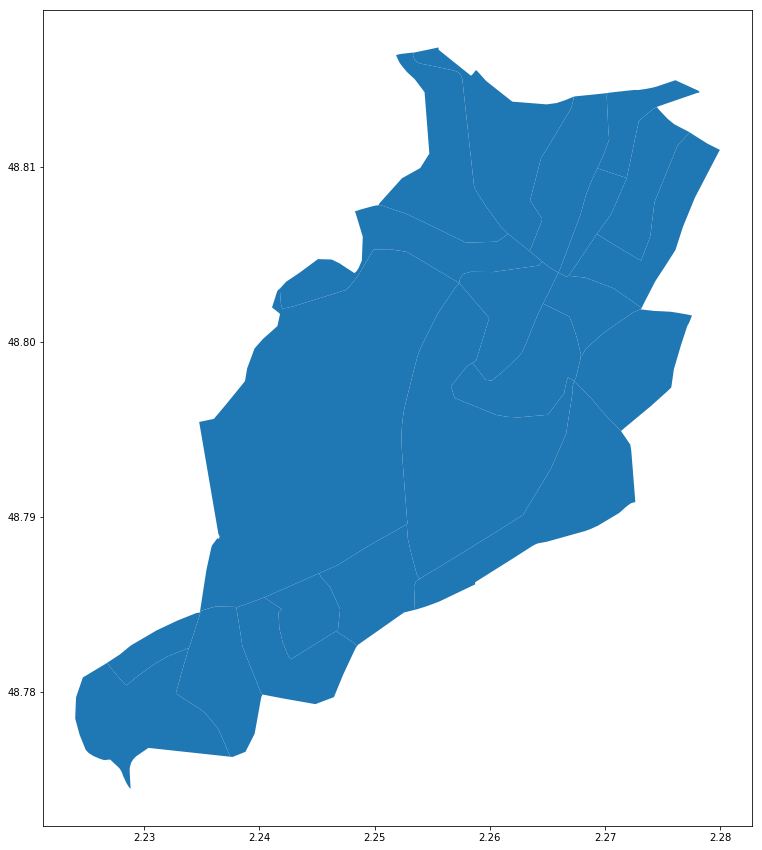

In [127]:
fig, ax = plt.subplots(figsize = (15,15))
street_map.plot(ax = ax)

In [128]:
df_crs_clamart = df_crs.loc[df_crs['Commune'] == 'CLAMART']

In [129]:
crs = 'epsg:4326'
geometry = [Point(xy) for xy in zip(df_crs_clamart["Longitude"], df_crs_clamart["Latitude"])]
geometry[:3]

In [131]:
#df_crs_clamart[df_crs_clamart['Commune'] == 'CLAMART'].head(2)

In [135]:
df_crs_clamart[['Raison sociale', 'Categorie d’etablissement','Libelle categorie d’etablissement' ]].head(20)

,Raison sociale,Categorie d’etablissement,Libelle categorie d’etablissement
86171,CATTP ROOSEVELT,425,Centre d'Accueil Thérapeutique à temps partiel...
86175,CMP DE CLAMART,156,Centre Médico-Psychologique (C.M.P.)
86180,CATTP TRIVAUX,425,Centre d'Accueil Thérapeutique à temps partiel...
86181,HDJ LA PIERRE AUX MOINES CLAMART,292,Centre Hospitalier Spécialisé lutte Maladies M...
86208,SAD CLAMARTOISE AIDE ET SOINS,460,Service d'Aide et d'Accompagnement à Domicile ...
86245,FONDATION D AUTEUIL,177,Maison d'Enfants à Caractère Social
86283,CDS MUNICIPAL AUVERGNE CLAMART,124,Centre de Santé
86292,IME SECTION POLYHANDICAPES MAILLERIE,188,Etablissement pour Enfants ou Adolescents Poly...
86308,IFSI DU CH ANTOINE BÉCLÈRE,300,Ecoles Formant aux Professions Sanitaires
86401,CDS MUNICIPAL JEAN JAURES CLAMART,124,Centre de Santé


In [136]:
geo_df = gpd.GeoDataFrame(df_crs_clamart, # our data
                          crs = crs, # our coordinate reference system
                          geometry = geometry) # the geometry list we created
geo_df.head()

,Numero FINESS ET,Numero FINESS EJ,Raison sociale,Raison sociale longue,Complement de raison sociale,Complement de distribution,Numero de voie,Type de voie,Libelle de voie,Complément de voie,...,CoordY,Source des coordonnées,Date de mise à jour des coordonnées,Code Postal,Commune,CRS,EPSG,Longitude,Latitude,geometry
86171,920000205,940140049,CATTP ROOSEVELT,CENTRE D ACCUEIL THERAPEUTIQUE A TEMPS PARTIEL,nan,nan,33,R,DU PRESID ROOSEVELT,nan,...,6856317.9,"1,ATLASANTE,87,IGN,BD_ADRESSE,V2.2,LAMBERT_93",2020-11-02,92140,CLAMART,LAMBERT_93,2154,2.258377,48.804634,POINT (2.25838 48.80463)
86175,920000270,940140049,CMP DE CLAMART,CMP ADULTES 92G16,nan,nan,60,R,DU PAVE BLANC,nan,...,6854056.4,"1,ATLASANTE,94,IGN,BD_ADRESSE,V2.2,LAMBERT_93",2020-11-02,92140,CLAMART,LAMBERT_93,2154,2.238203,48.784167,POINT (2.23820 48.78417)
86180,920000353,940140049,CATTP TRIVAUX,CENTRE D ACCUEIL THERAPEUTIQUE A TEMPS PARTIEL,nan,nan,142,nan,PORTE DE TRIVAUX,nan,...,6854131.3,"1,ATLASANTE,87,IGN,BD_ADRESSE,V2.2,LAMBERT_93",2020-11-02,92140,CLAMART,LAMBERT_93,2154,2.235518,48.784824,POINT (2.23552 48.78482)
86181,920000379,940140049,HDJ LA PIERRE AUX MOINES CLAMART,HOPITAL DE JOUR LA PIERRE AUX MOINES CLAMART,nan,nan,58,R,DU PAVE BLANC,nan,...,6854046.3,"1,ATLASANTE,94,IGN,BD_ADRESSE,V2.2,LAMBERT_93",2020-11-02,92140,CLAMART,LAMBERT_93,2154,2.238224,48.784077,POINT (2.23822 48.78408)
86208,920003282,920001898,SAD CLAMARTOISE AIDE ET SOINS,SAD CLAMARTOISE AIDE ET SOINS,nan,nan,1,AV,JEAN JAURES,nan,...,6855884.2,"1,ATLASANTE,100,IGN,BD_ADRESSE,V2.2,LAMBERT_93",2020-11-02,92140,CLAMART,LAMBERT_93,2154,2.263508,48.800765,POINT (2.26351 48.80077)


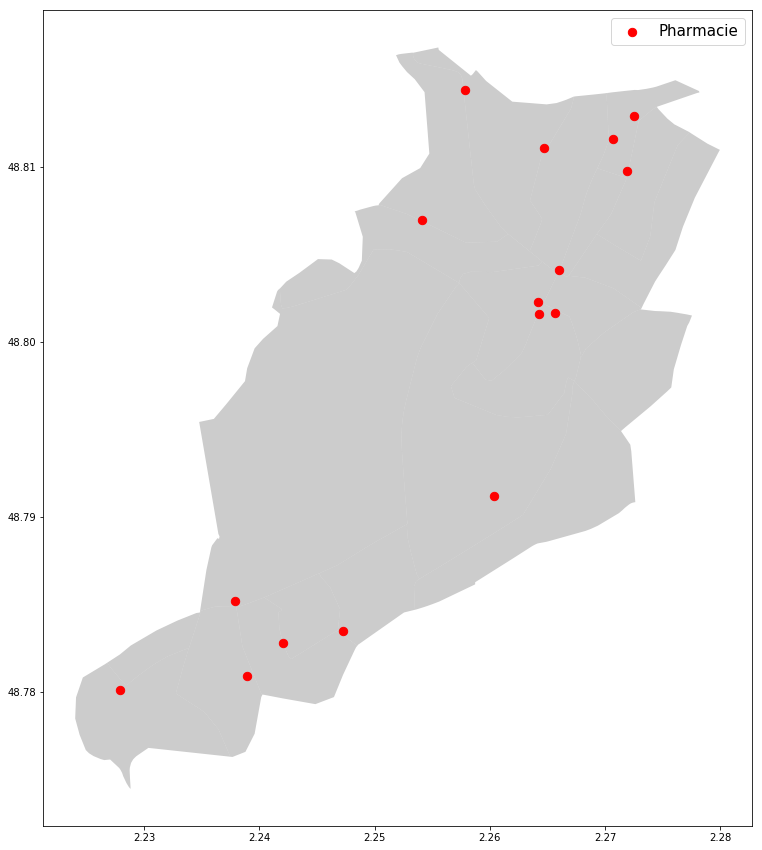

In [137]:
fig, ax = plt.subplots(figsize = (15, 15))
street_map.plot(ax = ax, alpha = 0.4, color='grey')
geo_df[geo_df['Categorie d’etablissement'] == '620'].plot(ax = ax, markersize = 70, color = "red", marker = "o", label = "Pharmacie")
plt.legend(prop={'size' : 15})